In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Boston.csv')
pd.set_option('display.max_columns', 80)
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [3]:
df.shape

(31984, 21)

In [4]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [5]:
df.isnull().sum()

10k             50
name             0
division         0
25k            216
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k             34
overall          0
pace             0
state         2576
30k             40
5k              52
half            72
20k             51
country          0
city             1
40k             39
dtype: int64

In [6]:
#Converting Data types and cleaning null values, droping categorical columns. 
df.replace('-', np.nan, inplace=True)
df['is_male'] = np.where((df.gender == 'M'), 1, 0)
df = df.drop(['ctz', 'bib', 'state', 'city', 'country', 'name', 'gender'], axis=1)
df = df.dropna(axis=0, how='any', subset=['half', '5k', '10k', '20k', '25k', '30k', '35k','40k'])
df[['half', '5k', '10k', '20k', '25k', '30k', '35k','40k']] = df[['half', '5k', '10k', '20k', '25k', '30k', '35k','40k']].astype(float)
df.isnull().sum()

10k          0
division     0
25k          0
age          0
official     0
genderdiv    0
35k          0
overall      0
pace         0
30k          0
5k           0
half         0
20k          0
40k          0
is_male      0
dtype: int64

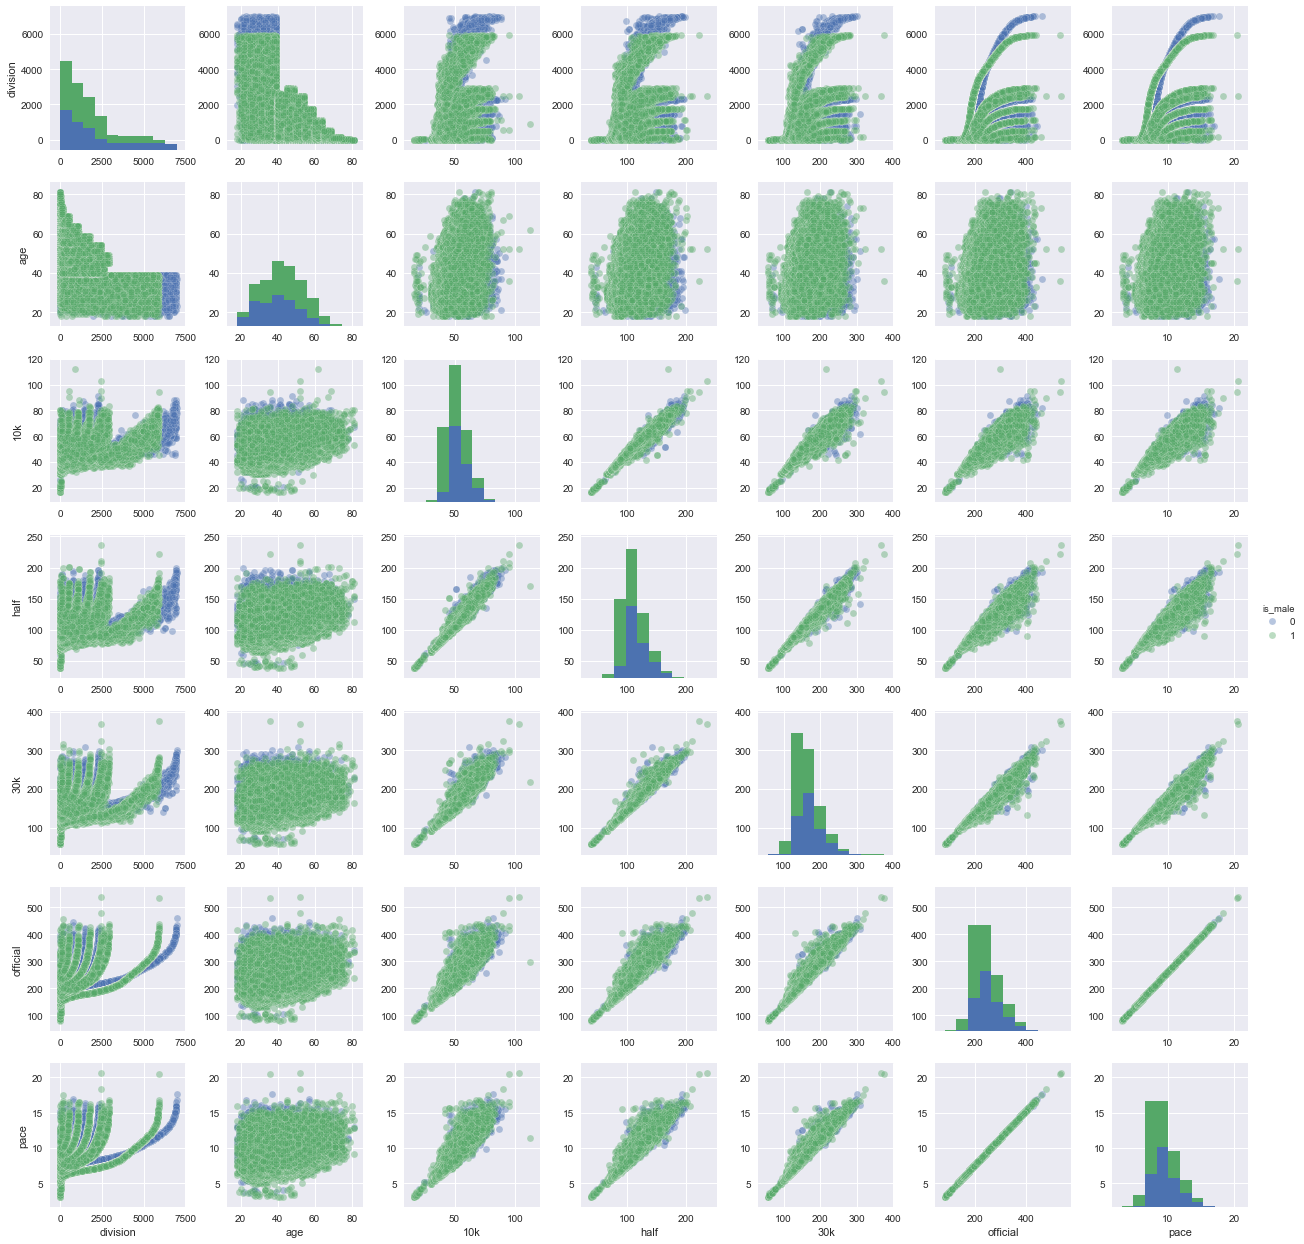

In [7]:
g = sns.pairplot(df, hue='is_male', vars=['division', 'age', '10k', 'half', '30k', 'official', 'pace'], plot_kws={'alpha': .40})

In [8]:
## mean shift clustering 
bandwidth = estimate_bandwidth(df, n_samples=500, random_state=77)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df)

labels = ms.labels_
len(np.unique(labels))

2

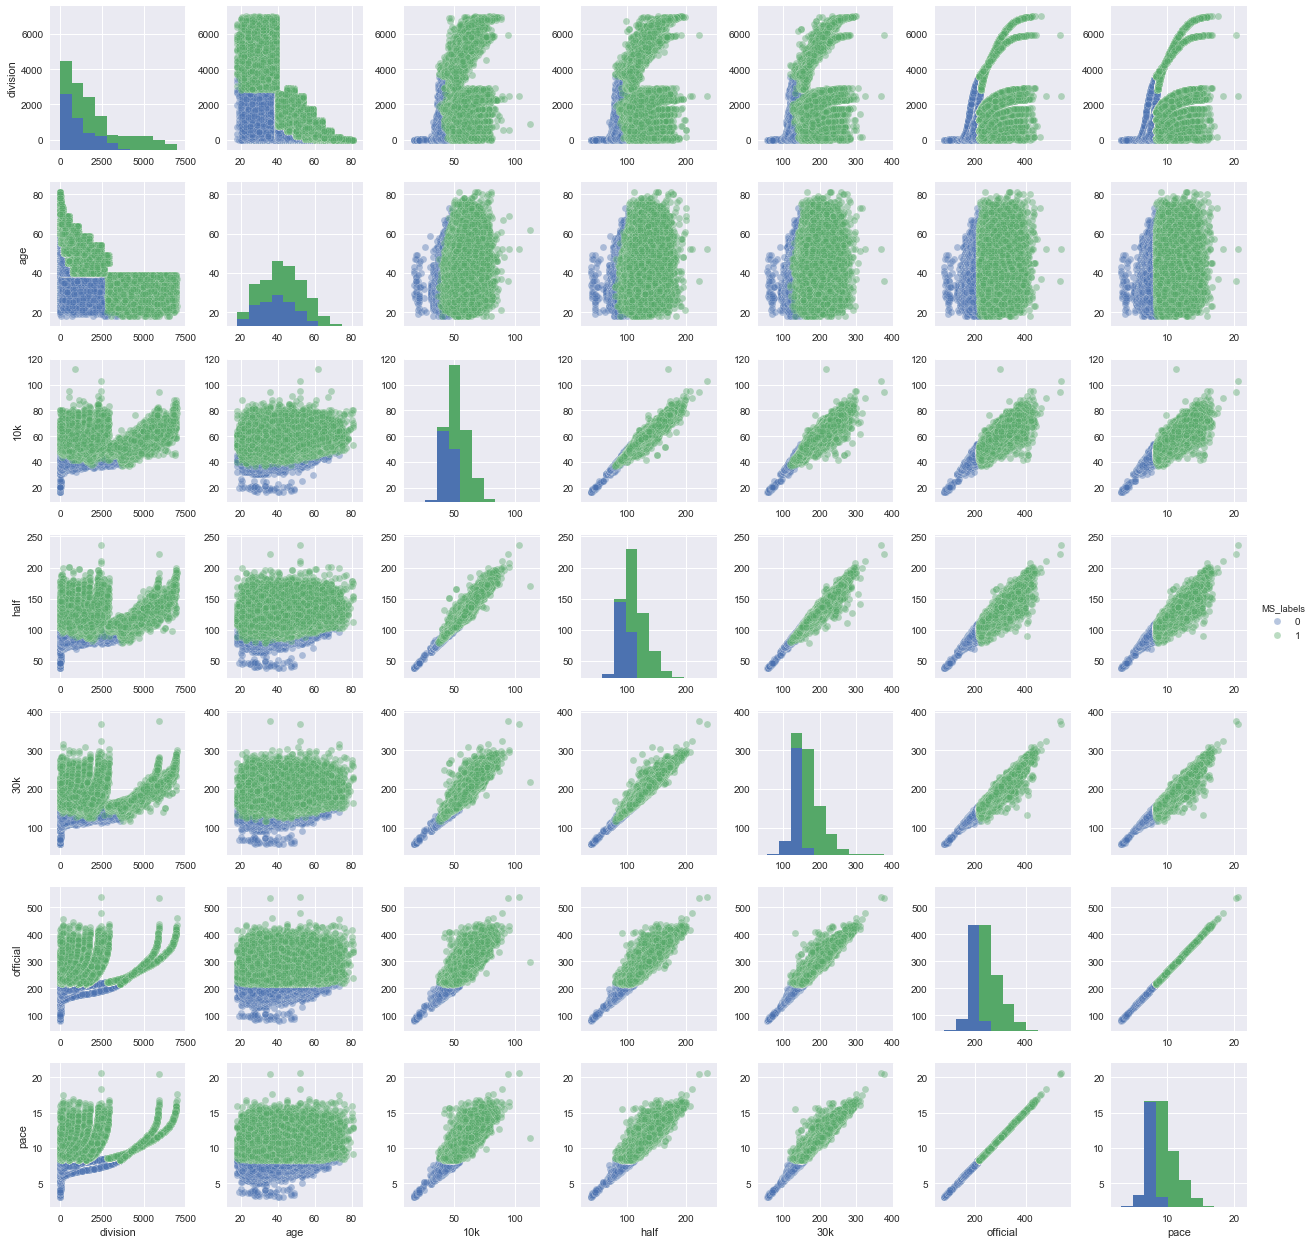

In [9]:
df['MS_labels'] = labels
g = sns.pairplot(df, hue='MS_labels', vars=['division', 'age', '10k', 'half', '30k', 'official', 'pace'], plot_kws={'alpha': .40})

In [11]:
df_sample = df.sample(1000)
silhouette_score(df_sample, df_sample['MS_labels'], metric='euclidean')

0.53840230668956646

The sillhouette score ranges from negative one to positive one. A score of .53 tells us that the data points are closer in distance(euclidean) to their cluster members then to data points in other clusters. This strong score was expected based on our graph of the clusters.

In [20]:
cluster_one = df[(df.MS_labels == 0)]
cluster_two = df[(df.MS_labels == 1)]

print('Cluster One\'s Finish Time Stats:')
print(cluster_one['official'].describe())
print('\nCluster Two\'s Finish Time Stats:')
print(cluster_two['official'].describe())

Cluster One's Finish Time Stats:
count    12760.000000
mean       196.552734
std         18.138241
min         80.600000
25%        184.520000
50%        199.520000
75%        210.700000
max        224.180000
Name: official, dtype: float64

Cluster Two's Finish Time Stats:
count    18889.000000
mean       272.621001
std         42.142564
min        217.450000
25%        237.770000
50%        262.380000
75%        297.570000
max        538.880000
Name: official, dtype: float64
